[View in Colaboratory](https://colab.research.google.com/github/sabumjung/Tensorflow/blob/master/%EC%95%88%EB%85%95%ED%95%98%EC%84%B8%EC%9A%94,_Colaboratory%EC%9E%85%EB%8B%88%EB%8B%A4.ipynb)

 ## Colaboratory에 오신 것을 환영합니다!

Colaboratory는 텍스트, 코드, 코드 출력을 하나의 공동작업 문서로 통합해 주는 데이터 분석 도구입니다.

In [0]:
print('Hello, Colaboratory!')

Hello, Colaboratory!


 Colaboratory를 사용하면 클릭 한 번만으로 사용 중인 브라우저에서 텐서플로우 코드를 실행할 수 있습니다. 아래의 예에서는 두 개의 행렬을 추가합니다.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

 Colaboratory에는 [matplotlib](https://matplotlib.org/)와 같이 널리 사용되는 라이브러리가 포함되어 시각화를 단순화할 수 있습니다.

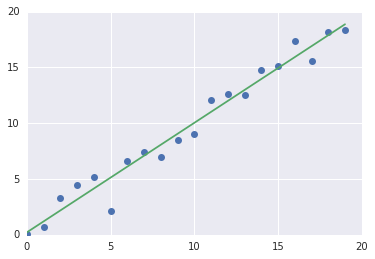

In [0]:
import matplotlib.pyplot as plt

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-');

 Colaboratory는 Google Cloud BigQuery와 함께 사용할 수 있습니다.

[샘플 BigQuery 노트](/notebooks/bigquery.ipynb).

In [2]:
no_classes = 10
image_height, image_width = 28, 28

import tensorflow as tf
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()



11493376/11490434 [==============================] - 3s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0], image_height,image_width, 1)
x_test = x_test.reshape(x_test.shape[0], image_height, image_width,1)
input_shape = (image_height, image_width, 1)

answer[ 5 ]
answer[ 0 ]
answer[ 4 ]


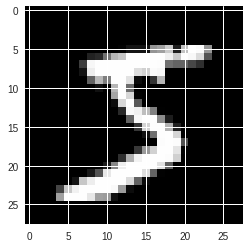

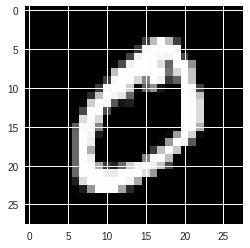

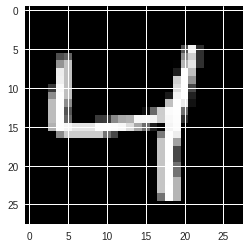

In [5]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

for idx in range(0,3):
    print('answer[' , y_train[idx] ,']')
    plt.figure()
    plt.imshow(x_train[idx].reshape(28,28), cmap=cm.Greys_r)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, no_classes)
y_test = tf.keras.utils.to_categorical(y_test, no_classes)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print (y_train[:10])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.utils import np_utils

model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28, 1)))
print(model.output_shape)

(None, 26, 26, 32)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [10]:
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
print(model.output_shape)

(None, 12, 12, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [11]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 10)


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
batch_size = 128
epochs = 2
model.fit(x_train, y_train, batch_size=128, nb_epoch=1, verbose=1,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 8s 171us/step - loss: 0.2978 - acc: 0.9084 - val_loss: 0.0677 - val_acc: 0.9800


In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06039336496507749
Test accuracy: 0.9807
